# GAN: Generative Adversarial Network
Date: 15/12/2021

In [5]:
import tensorflow as tf
import tensorflow.keras
print(tensorflow.__version__)
print(tensorflow.keras.__version__)

2.7.0
2.7.0


In [6]:
pip install tqdm

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU

In [8]:
!pip install adam
import adam

In [9]:
def load_data():
  (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
  xtrain = (xtrain.astype(np.float32)- 127.5)/127.5
  #Convert shape of xtrain from (60000, 28, 28) to (60000, 784)
  #784 columns per row
  xtrain = xtrain.reshape(60000, 784)
  return(xtrain, ytrain, xtest, ytest)

In [10]:
(xtrain, ytrain, xtest, ytest) = load_data()
print(xtrain.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)


In [11]:
# Optional, as opt is declared in next cell
def adam_optimizer():
  return adam(lr=0.0002, beta_1 =0.5)

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5)

def create_generator():
  generator=Sequential()
  generator.add(Dense(units=256, input_dim=100))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=512))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=1024))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=784, activation='tanh'))
  generator.compile(loss='binary_crossentropy', optimizer=opt)
  return generator

g = create_generator()
g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_23 (Dense)            (None, 784)              

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5)

def create_discriminator():
  discriminator=Sequential()
  discriminator.add(Dense(units=1024, input_dim=784))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(units=512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dense(units=1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=opt)
  return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)              

In [20]:
def create_gan(discriminator, generator):
  discriminator.trainable=False
  gan_input = Input(shape=(100, ))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs = gan_input, outputs=gan_output)
  gan.compile(loss='binary_crossentropy', optimizer='adam')
  return gan

gan=create_gan(d,g)
gan.summary()  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_5 (Sequential)   (None, 784)               1486352   
                                                                 
 sequential_6 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [21]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
  noise = np.random.normal(loc=0, scale=1, size=[examples, 100])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(100,28,28)
  plt.figure(figsize=figsize)
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], interpolation='nearest')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

Epoch 1


100%|██████████| 128/128 [00:36<00:00,  3.48it/s]


Epoch 2


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 3


100%|██████████| 128/128 [00:24<00:00,  5.20it/s]


Epoch 4


100%|██████████| 128/128 [00:25<00:00,  5.07it/s]


Epoch 5


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 6


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 7


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 8


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 9


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 10


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 11


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 12


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 13


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 14


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 15


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 16


100%|██████████| 128/128 [00:24<00:00,  5.23it/s]


Epoch 17


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 18


100%|██████████| 128/128 [00:25<00:00,  5.06it/s]


Epoch 19


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 20


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 21


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 22


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 23


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 24


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 25


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 26


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 27


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 28


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 29


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 30


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 31


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 32


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 33


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 34


100%|██████████| 128/128 [00:25<00:00,  5.02it/s]


Epoch 35


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 36


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 37


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 38


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 39


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 40


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 41


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 42


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 43


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 44


100%|██████████| 128/128 [00:24<00:00,  5.22it/s]


Epoch 45


100%|██████████| 128/128 [00:24<00:00,  5.13it/s]


Epoch 46


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 47


100%|██████████| 128/128 [00:24<00:00,  5.16it/s]


Epoch 48


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 49


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 50


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 51


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 52


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 53


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 54


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 55


100%|██████████| 128/128 [00:23<00:00,  5.44it/s]


Epoch 56


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 57


100%|██████████| 128/128 [00:24<00:00,  5.26it/s]


Epoch 58


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 59


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 60


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 61


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 62


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 63


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 64


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 65


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 66


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 67


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 68


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 69


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 70


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 71


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 72


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 73


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 74


100%|██████████| 128/128 [00:24<00:00,  5.15it/s]


Epoch 75


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 76


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 77


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 78


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 79


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 80


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 81


100%|██████████| 128/128 [00:24<00:00,  5.22it/s]


Epoch 82


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 83


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 84


100%|██████████| 128/128 [00:24<00:00,  5.25it/s]


Epoch 85


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 86


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 87


100%|██████████| 128/128 [00:24<00:00,  5.23it/s]


Epoch 88


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 89


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 90


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 91


100%|██████████| 128/128 [00:24<00:00,  5.23it/s]


Epoch 92


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 93


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 94


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 95


100%|██████████| 128/128 [00:25<00:00,  4.98it/s]


Epoch 96


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 97


100%|██████████| 128/128 [00:24<00:00,  5.22it/s]


Epoch 98


100%|██████████| 128/128 [00:24<00:00,  5.22it/s]


Epoch 99


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 100


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 101


100%|██████████| 128/128 [00:25<00:00,  5.03it/s]


Epoch 102


100%|██████████| 128/128 [00:24<00:00,  5.23it/s]


Epoch 103


100%|██████████| 128/128 [00:24<00:00,  5.22it/s]


Epoch 104


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 105


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 106


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 107


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 108


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 109


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 110


100%|██████████| 128/128 [00:24<00:00,  5.26it/s]


Epoch 111


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 112


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 113


100%|██████████| 128/128 [00:24<00:00,  5.21it/s]


Epoch 114


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 115


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 116


100%|██████████| 128/128 [00:24<00:00,  5.25it/s]


Epoch 117


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 118


100%|██████████| 128/128 [00:24<00:00,  5.19it/s]


Epoch 119


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 120


100%|██████████| 128/128 [00:25<00:00,  5.06it/s]


Epoch 121


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 122


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 123


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 124


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 125


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 126


100%|██████████| 128/128 [00:24<00:00,  5.26it/s]


Epoch 127


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 128


100%|██████████| 128/128 [00:24<00:00,  5.25it/s]


Epoch 129


100%|██████████| 128/128 [00:25<00:00,  4.99it/s]


Epoch 130


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 131


100%|██████████| 128/128 [00:24<00:00,  5.25it/s]


Epoch 132


100%|██████████| 128/128 [00:24<00:00,  5.25it/s]


Epoch 133


100%|██████████| 128/128 [00:24<00:00,  5.13it/s]


Epoch 134


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 135


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 136


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 137


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 138


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 139


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 140


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 141


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 142


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 143


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 144


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 145


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 146


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 147


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 148


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 149


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 150


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 151


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 152


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 153


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 154


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 155


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 156


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 157


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 158


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 159


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 160


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 161


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 162


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 163


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 164


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 165


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 166


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 167


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 168


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 169


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 170


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 171


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 172


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 173


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 174


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 175


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 176


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 177


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 178


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 179


100%|██████████| 128/128 [00:25<00:00,  5.08it/s]


Epoch 180


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 181


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 182


100%|██████████| 128/128 [00:23<00:00,  5.44it/s]


Epoch 183


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 184


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 185


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 186


100%|██████████| 128/128 [00:23<00:00,  5.42it/s]


Epoch 187


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 188


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 189


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 190


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 191


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 192


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 193


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 194


100%|██████████| 128/128 [00:24<00:00,  5.12it/s]


Epoch 195


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 196


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 197


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 198


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 199


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 200


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 201


100%|██████████| 128/128 [00:23<00:00,  5.47it/s]


Epoch 202


100%|██████████| 128/128 [00:23<00:00,  5.48it/s]


Epoch 203


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 204


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 205


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 206


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 207


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 208


100%|██████████| 128/128 [00:23<00:00,  5.52it/s]


Epoch 209


100%|██████████| 128/128 [00:23<00:00,  5.47it/s]


Epoch 210


100%|██████████| 128/128 [00:23<00:00,  5.49it/s]


Epoch 211


100%|██████████| 128/128 [00:23<00:00,  5.51it/s]


Epoch 212


100%|██████████| 128/128 [00:25<00:00,  5.10it/s]


Epoch 213


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 214


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 215


100%|██████████| 128/128 [00:23<00:00,  5.48it/s]


Epoch 216


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 217


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 218


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 219


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 220


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 221


100%|██████████| 128/128 [00:23<00:00,  5.50it/s]


Epoch 222


100%|██████████| 128/128 [00:23<00:00,  5.50it/s]


Epoch 223


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 224


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 225


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 226


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 227


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 228


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 229


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 230


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 231


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 232


100%|██████████| 128/128 [00:25<00:00,  4.97it/s]


Epoch 233


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 234


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 235


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 236


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 237


100%|██████████| 128/128 [00:23<00:00,  5.42it/s]


Epoch 238


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 239


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 240


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 241


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 242


100%|██████████| 128/128 [00:23<00:00,  5.44it/s]


Epoch 243


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 244


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 245


100%|██████████| 128/128 [00:23<00:00,  5.42it/s]


Epoch 246


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 247


100%|██████████| 128/128 [00:23<00:00,  5.44it/s]


Epoch 248


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 249


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 250


100%|██████████| 128/128 [00:23<00:00,  5.44it/s]


Epoch 251


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 252


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 253


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 254


100%|██████████| 128/128 [00:25<00:00,  4.97it/s]


Epoch 255


100%|██████████| 128/128 [00:23<00:00,  5.33it/s]


Epoch 256


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 257


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 258


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 259


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 260


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 261


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 262


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 263


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 264


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 265


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 266


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 267


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 268


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 269


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 270


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 271


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 272


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 273


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 274


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 275


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 276


100%|██████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 277


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 278


100%|██████████| 128/128 [00:23<00:00,  5.42it/s]


Epoch 279


100%|██████████| 128/128 [00:26<00:00,  4.85it/s]


Epoch 280


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 281


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 282


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 283


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 284


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 285


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 286


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 287


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 288


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 289


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 290


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 291


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 292


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 293


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 294


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 295


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 296


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 297


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 298


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 299


100%|██████████| 128/128 [00:23<00:00,  5.45it/s]


Epoch 300


100%|██████████| 128/128 [00:23<00:00,  5.33it/s]


Epoch 301


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 302


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 303


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 304


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 305


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 306


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 307


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 308


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 309


100%|██████████| 128/128 [00:23<00:00,  5.42it/s]


Epoch 310


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 311


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 312


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 313


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 314


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 315


100%|██████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 316


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 317


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 318


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 319


100%|██████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 320


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 321


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 322


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 323


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 324


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 325


100%|██████████| 128/128 [00:23<00:00,  5.41it/s]


Epoch 326


100%|██████████| 128/128 [00:26<00:00,  4.86it/s]


Epoch 327


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 328


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 329


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 330


100%|██████████| 128/128 [00:23<00:00,  5.37it/s]


Epoch 331


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 332


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 333


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 334


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 335


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 336


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 337


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 338


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 339


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 340


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 341


100%|██████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 342


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 343


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 344


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 345


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 346


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 347


100%|██████████| 128/128 [00:24<00:00,  5.21it/s]


Epoch 348


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 349


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 350


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 351


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 352


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 353


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 354


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 355


100%|██████████| 128/128 [00:24<00:00,  5.14it/s]


Epoch 356


100%|██████████| 128/128 [00:24<00:00,  5.16it/s]


Epoch 357


100%|██████████| 128/128 [00:24<00:00,  5.17it/s]


Epoch 358


100%|██████████| 128/128 [00:24<00:00,  5.23it/s]


Epoch 359


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 360


100%|██████████| 128/128 [00:27<00:00,  4.66it/s]


Epoch 361


100%|██████████| 128/128 [00:24<00:00,  5.26it/s]


Epoch 362


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 363


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 364


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 365


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 366


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 367


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 368


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 369


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 370


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 371


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 372


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 373


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 374


100%|██████████| 128/128 [00:24<00:00,  5.31it/s]


Epoch 375


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 376


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 377


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 378


100%|██████████| 128/128 [00:24<00:00,  5.26it/s]


Epoch 379


100%|██████████| 128/128 [00:24<00:00,  5.27it/s]


Epoch 380


100%|██████████| 128/128 [00:24<00:00,  5.20it/s]


Epoch 381


100%|██████████| 128/128 [00:24<00:00,  5.29it/s]


Epoch 382


100%|██████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 383


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 384


100%|██████████| 128/128 [00:24<00:00,  5.32it/s]


Epoch 385


100%|██████████| 128/128 [00:27<00:00,  4.72it/s]


Epoch 386


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 387


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 388


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 389


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 390


100%|██████████| 128/128 [00:24<00:00,  5.28it/s]


Epoch 391


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 392


100%|██████████| 128/128 [00:24<00:00,  5.30it/s]


Epoch 393


100%|██████████| 128/128 [00:24<00:00,  5.25it/s]


Epoch 394


100%|██████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 395


100%|██████████| 128/128 [00:24<00:00,  5.24it/s]


Epoch 396


100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


Epoch 397


100%|██████████| 128/128 [00:23<00:00,  5.38it/s]


Epoch 398


100%|██████████| 128/128 [00:23<00:00,  5.33it/s]


Epoch 399


100%|██████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 400


100%|██████████| 128/128 [00:24<00:00,  5.23it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


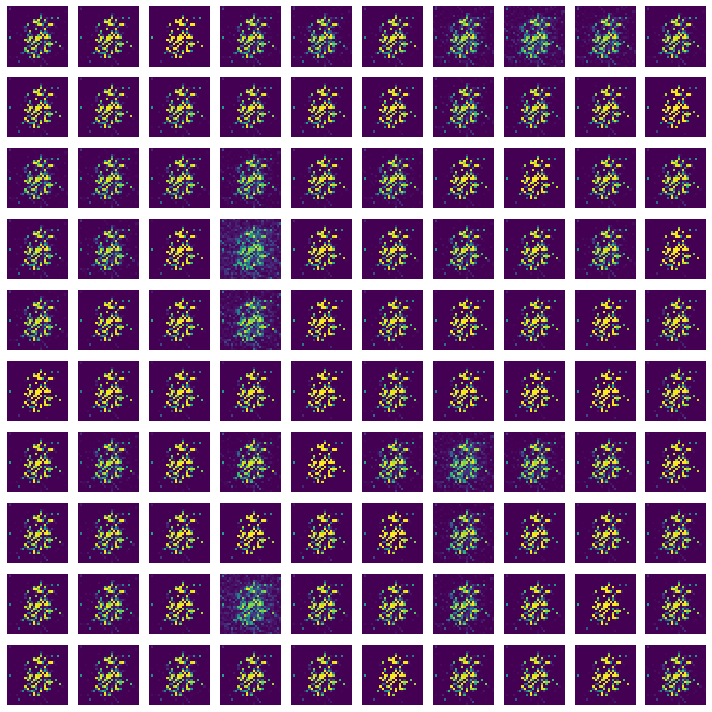

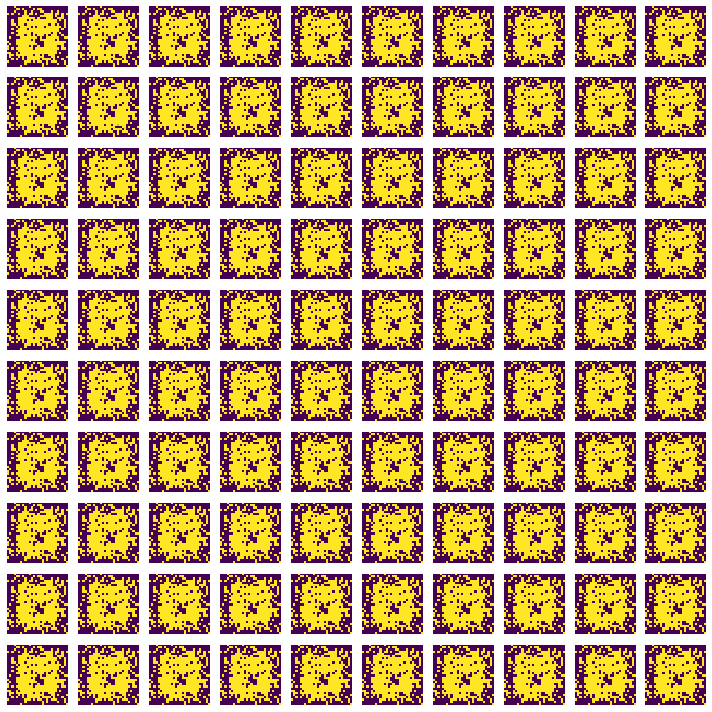

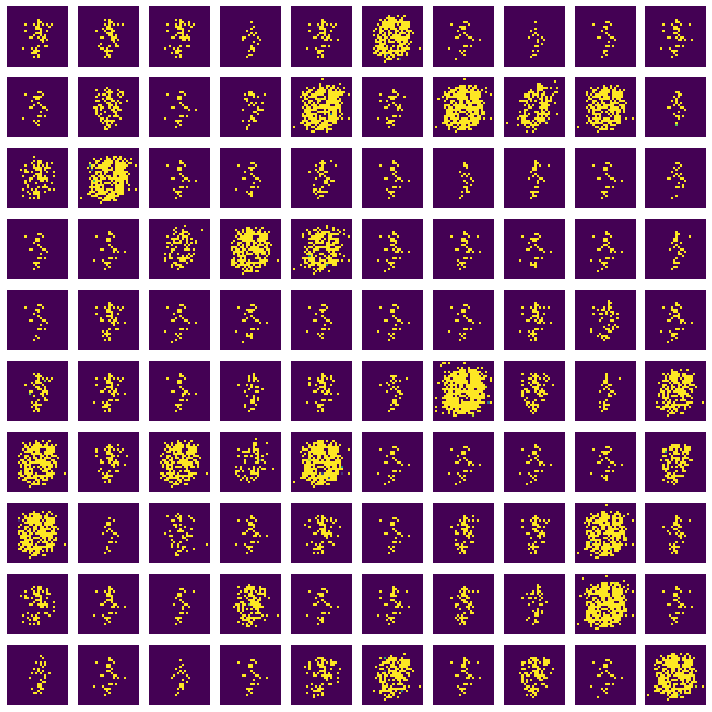

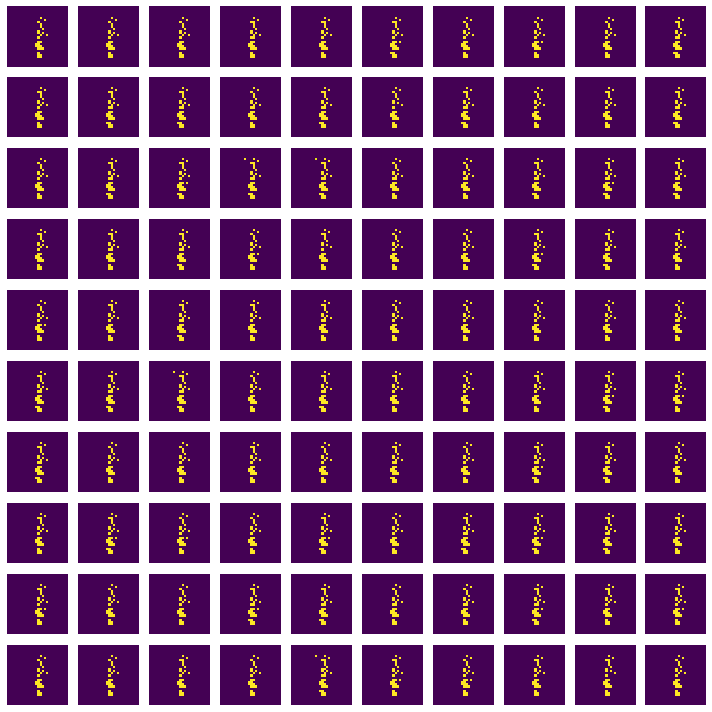

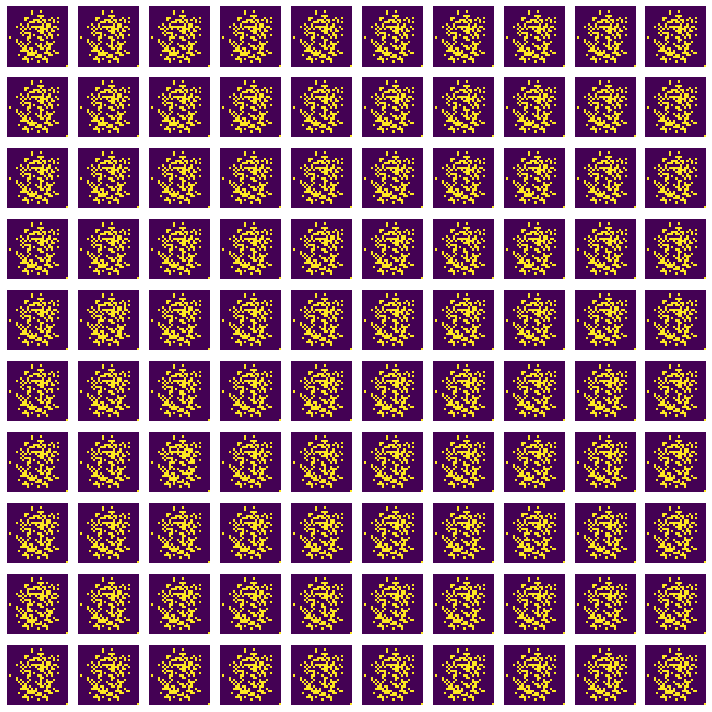

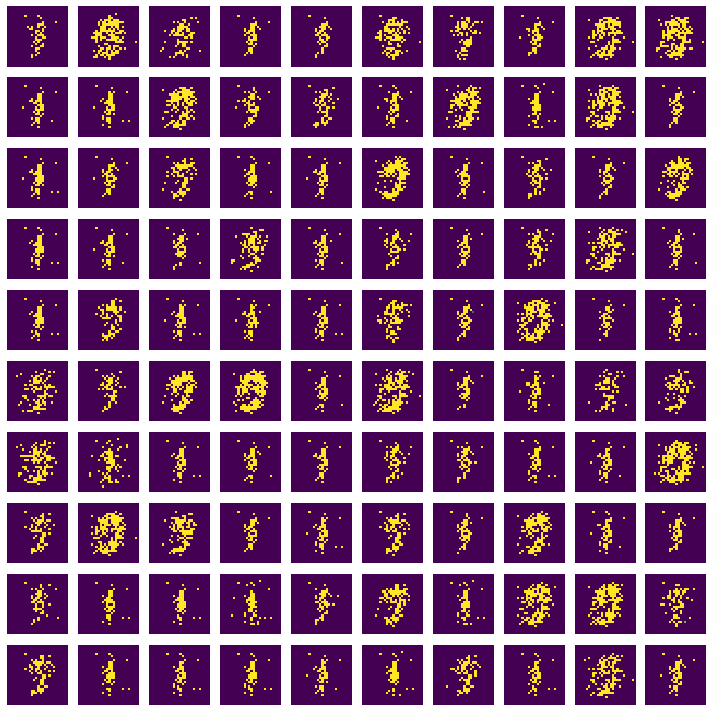

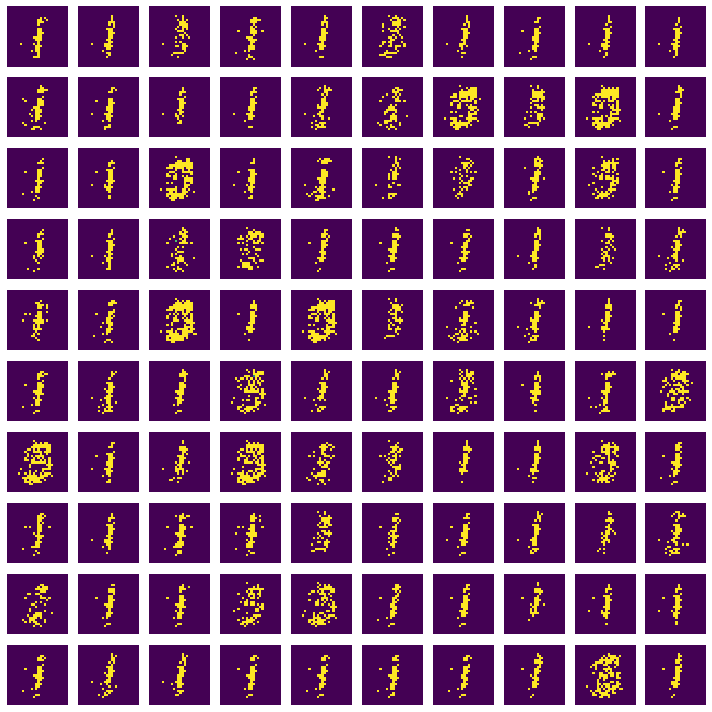

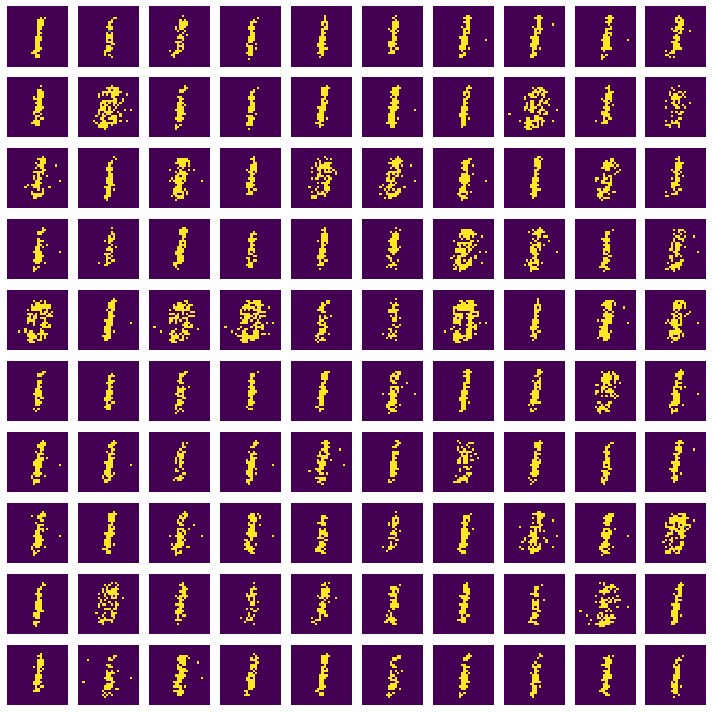

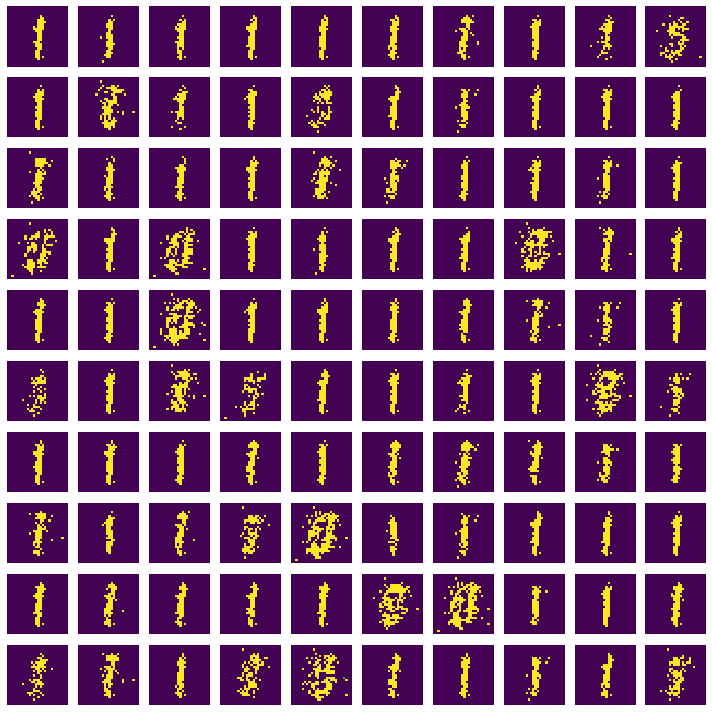

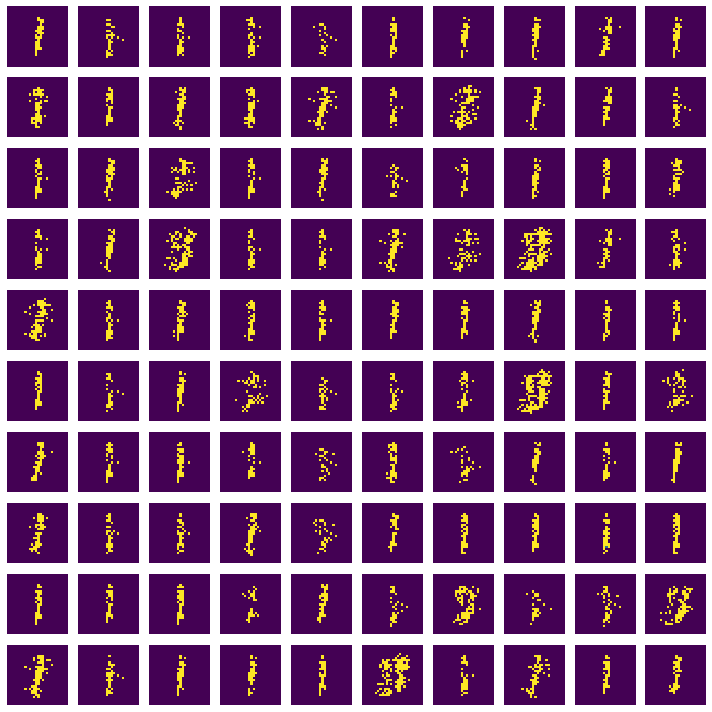

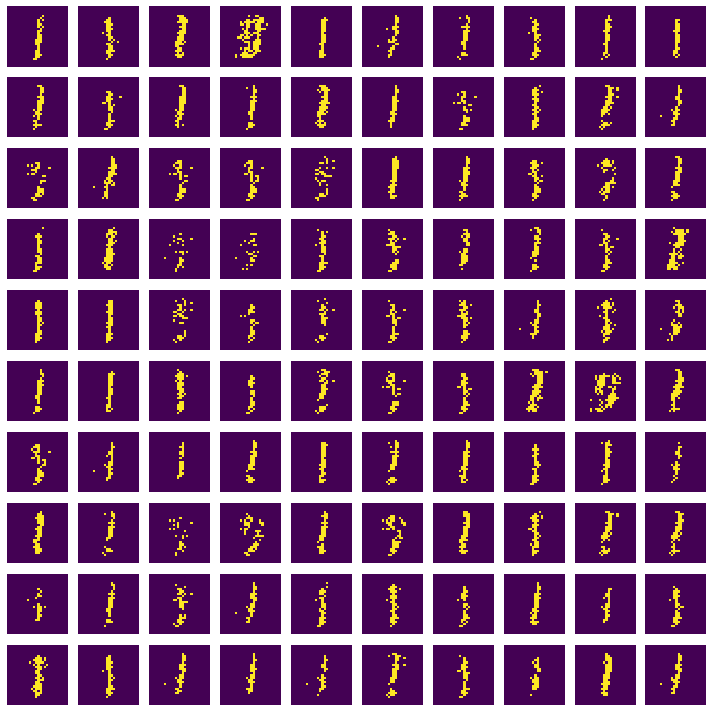

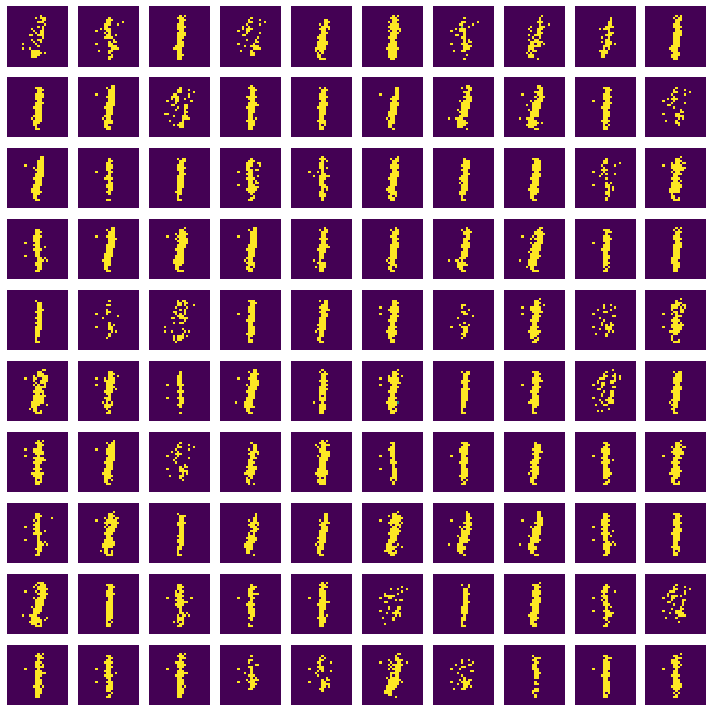

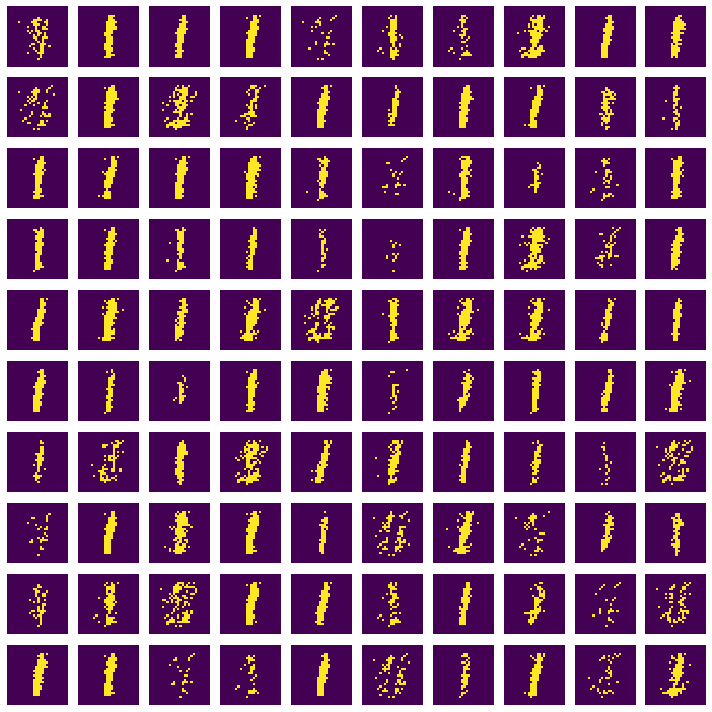

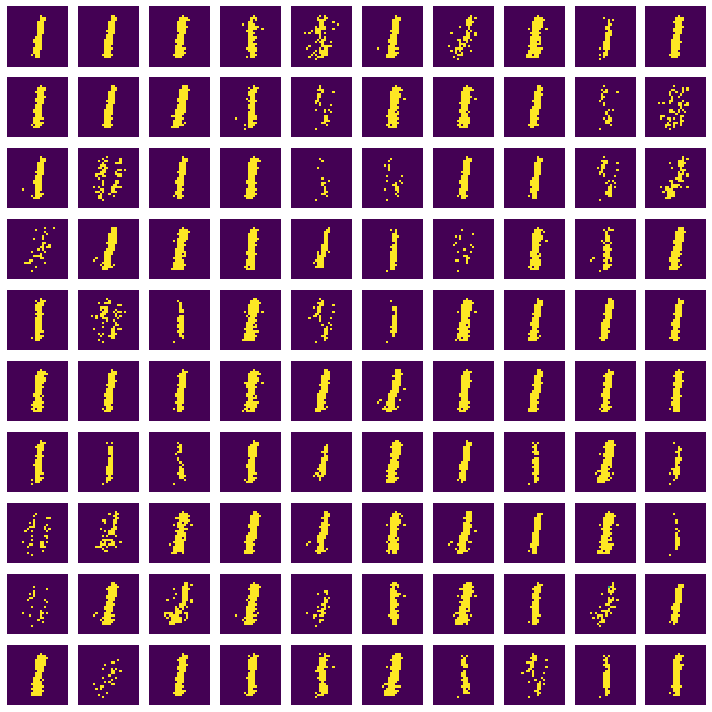

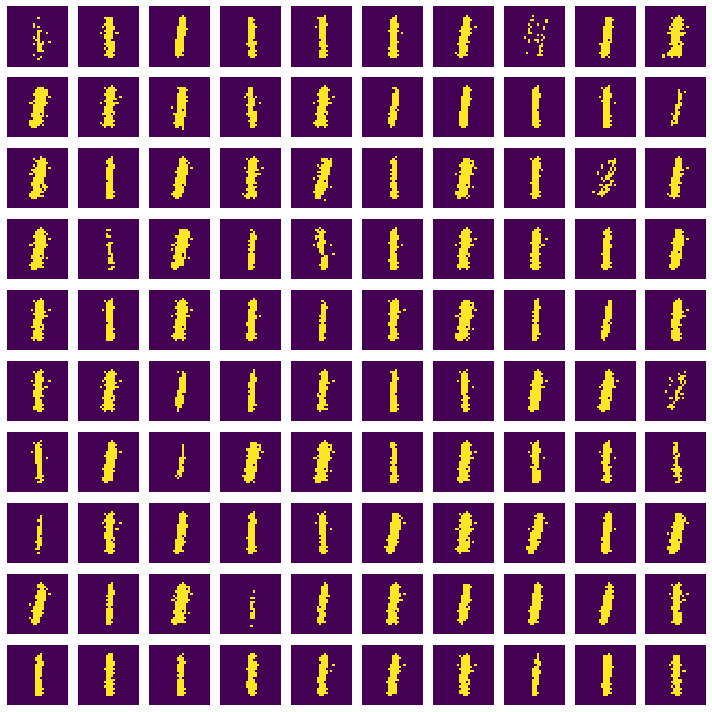

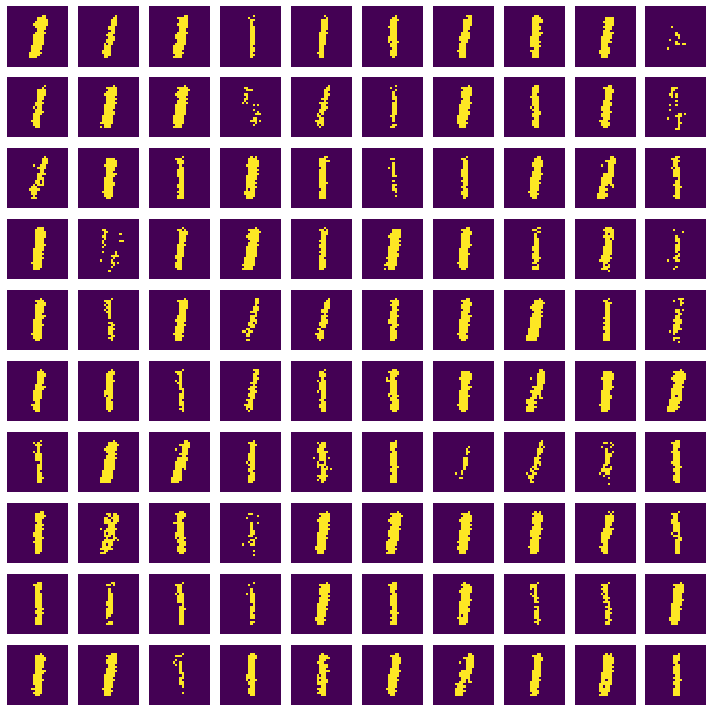

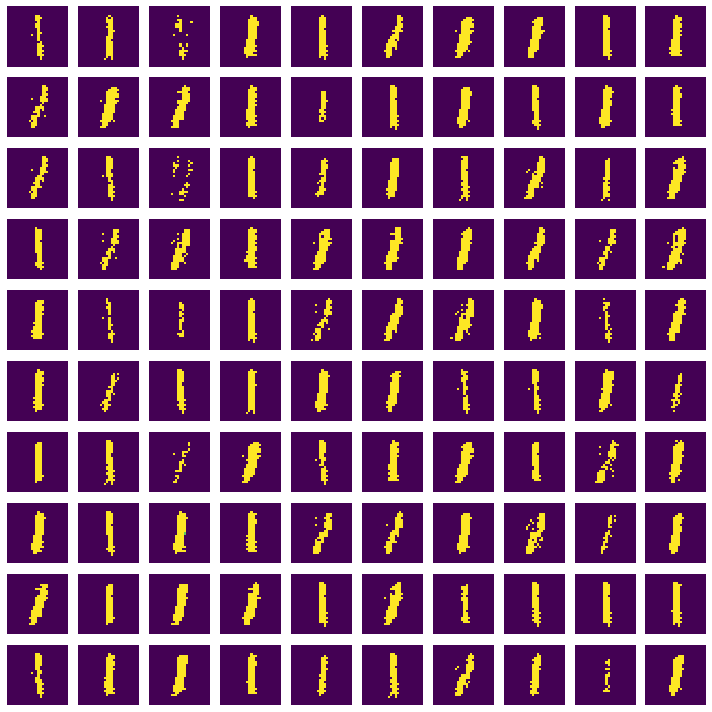

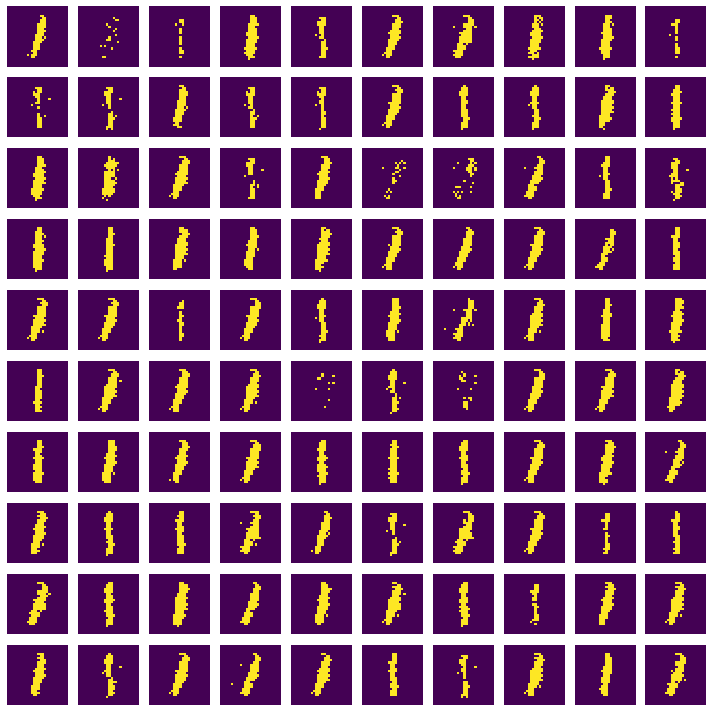

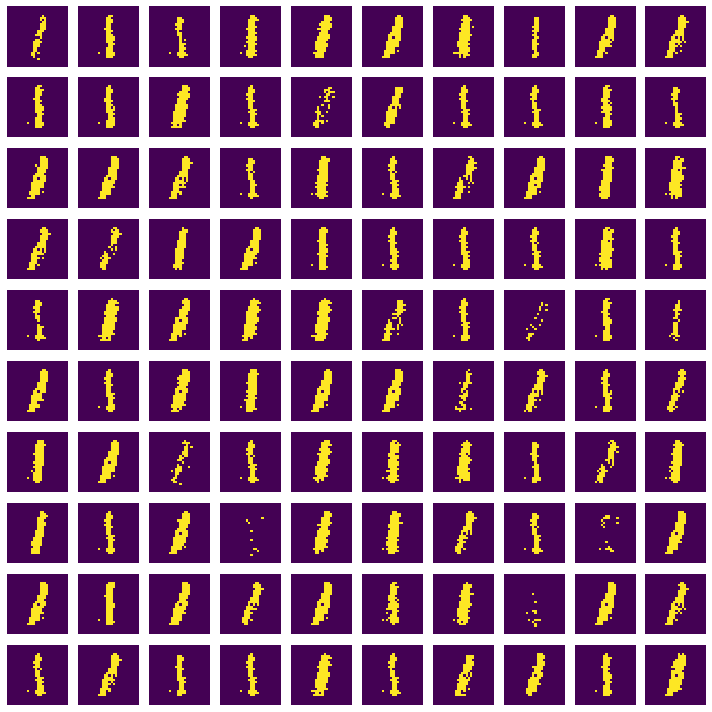

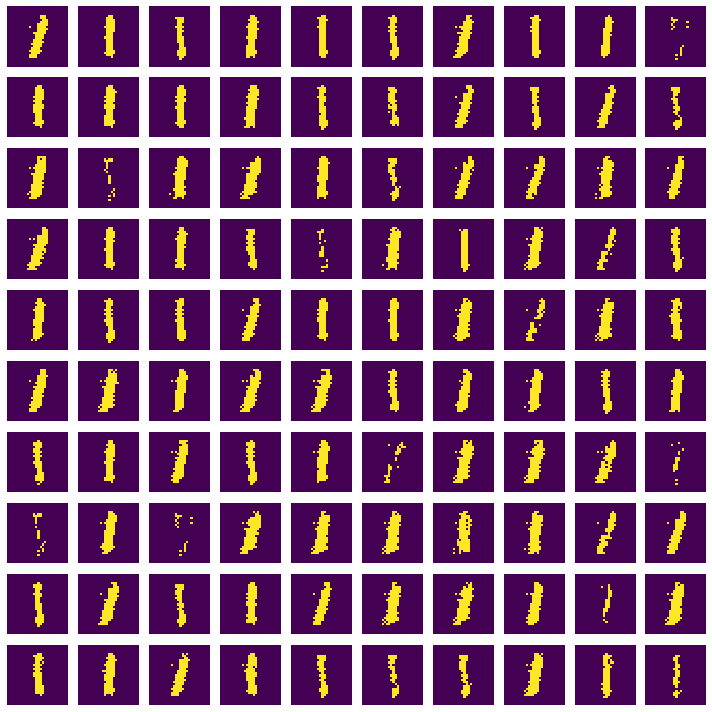

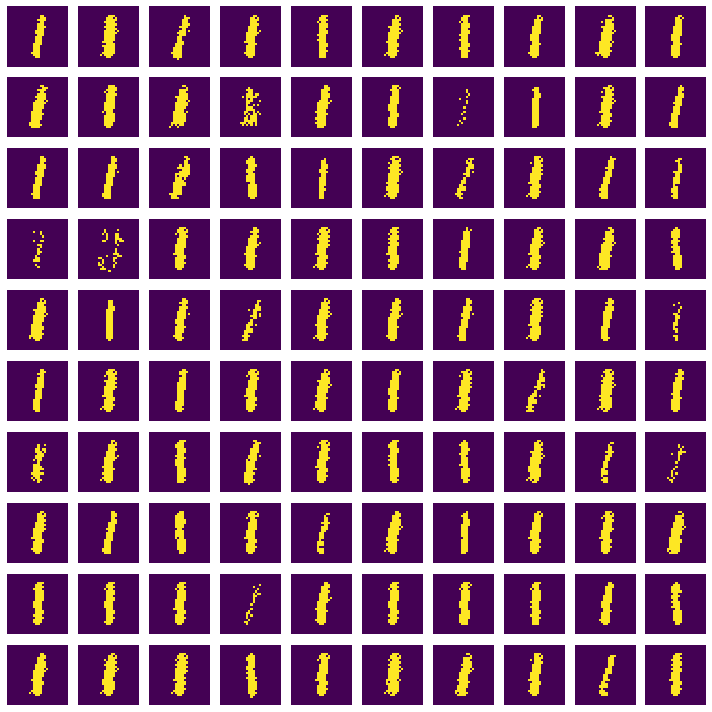

In [22]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, the weights of discriminator should be fixed. 
            # We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)
training(400,128)